# Installation

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration

In [3]:
LAW_FILE_PATH = '../data/alqac25_law.json'
TRAIN_FILE_PATH = '../data/alqac25_train.json'

# Load data

In [5]:
# 1. Get insight of law
with open (LAW_FILE_PATH, 'r', encoding ='utf-8') as f:
    laws_data = json.load(f)

with open(TRAIN_FILE_PATH, 'r', encoding='utf-8') as f:
    train_data = json.load(f)


# Analyse Law Data

In [6]:
articles = []
for law in laws_data:
    for article in law['articles']:
        articles.append({
            'law_id': law['id'],
            'article_id': article['id'],
            'text': article['text'],
            'text_length': len(article['text']),
            'word_count': len(article['text'].split())
            
        })

df_articles = pd.DataFrame(articles)

In [7]:
print(f'Total number of laws: {len(laws_data)}')
print(f'Total number of articles: {len(articles)}')
print('Articles length statistics:')
print(df_articles[['text_length', 'word_count']].describe())

Total number of laws: 28
Total number of articles: 3368
Articles length statistics:
        text_length   word_count
count   3368.000000  3368.000000
mean    1080.540974   239.497031
std     1074.332247   239.311440
min       17.000000     4.000000
25%      427.000000    94.000000
50%      751.500000   165.000000
75%     1351.250000   298.250000
max    14163.000000  3169.000000


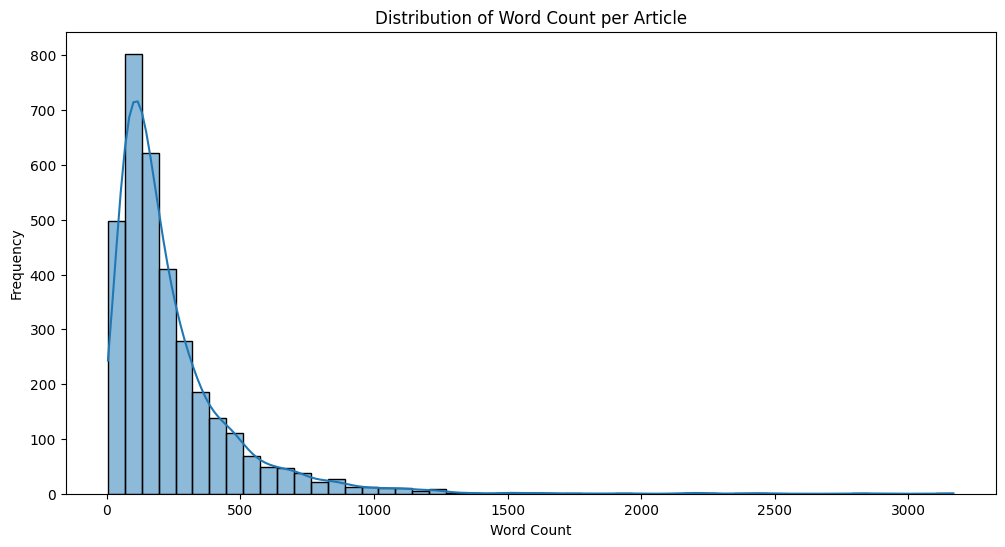

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df_articles['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count per Article')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Analyze Training Data

In [10]:
questions = []
for item in train_data:
    questions.append({
        'question_id': item['question_id'],
        'question_type': item['question_type'],
        'text': item['text'],
        'text_length': len(item['text']),
        'word_count': len(item['text'].split()),
    })
    df_questions = pd.DataFrame(questions)

In [12]:
print(f'Total length of training question: {len(df_questions)}')
print("Question length statistics:")
print(df_questions[['text_length', 'word_count']].describe())

Total length of training question: 729
Question length statistics:
       text_length  word_count
count   729.000000  729.000000
mean    125.075446   27.739369
std      63.347733   13.981369
min      13.000000    4.000000
25%      78.000000   17.000000
50%     112.000000   25.000000
75%     156.000000   35.000000
max     424.000000   90.000000


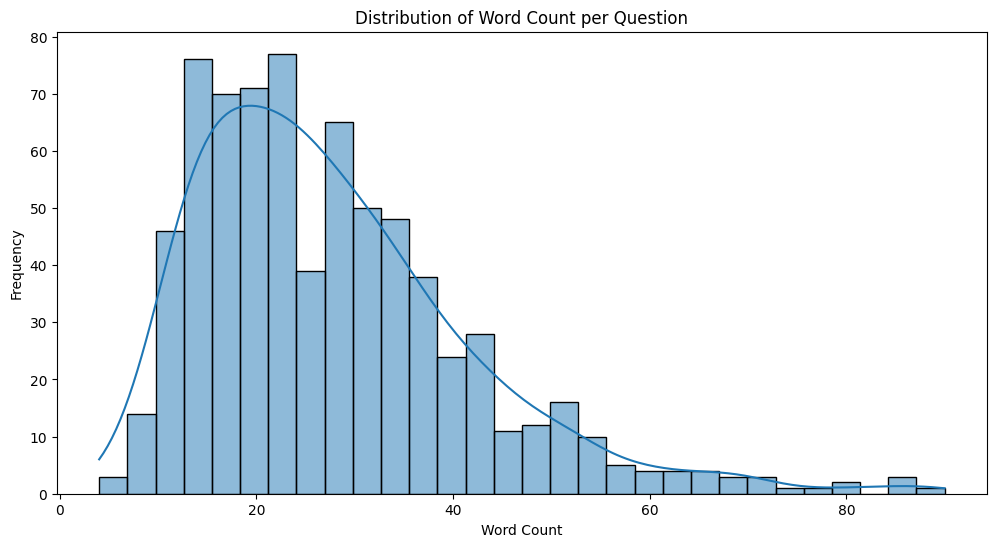

In [13]:
# Visualize question length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df_questions['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count per Question')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

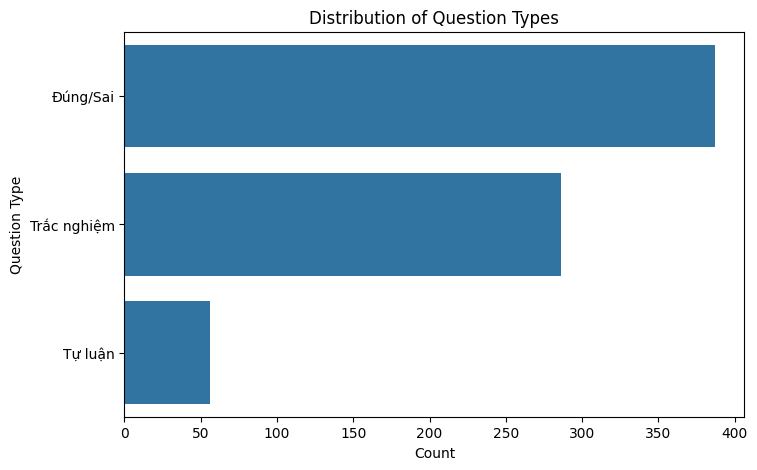

In [14]:
# Analyze question types
plt.figure(figsize=(8, 5))
sns.countplot(y=df_questions['question_type'])
plt.title('Distribution of Question Types')
plt.xlabel('Count')
plt.ylabel('Question Type')
plt.show()

In [18]:
df_questions.loc[df_questions['question_type'] == 'Tự luận', 'text']

90     Trong trường hợp các bên không có thỏa thuận k...
91     Hồ sơ đề nghị cấp lại thẻ hướng dẫn viên du lị...
92     Thời hạn quản lý người sử dụng trái phép chất ...
93              Chức năng của Trung tâm trọng tài là gì?
94     Sau khi sổ hộ khẩu hết hiệu lực (hết ngày 31/1...
95     Vợ chồng đã ly hôn muốn xác lập lại quan hệ vợ...
96     Ai là người giữ vai trò quan trọng trong việc ...
97     Nguồn tài chính nào giữ vai trò chủ đạo trong ...
98     Cơ quan nào có trách nhiệm là cơ quan giúp Chí...
99     Cơ quan nào có trách nhiệm thống nhất quản lý ...
108    Công dân trong độ tuổi nào theo quy định sẽ đư...
109      Cơ quan nào chủ trì hoạt động Tháng Thanh niên?
114    Cơ quan nào thực hiện thống nhất quản lý nhà n...
148    Độ tuổi con có thể tự mình quản lý tài sản riê...
149    Người mẹ nhờ mang thai hộ được hưởng chế độ th...
150    Nhà nước và xã hội khuyến khích việc gì khi vợ...
151    Cơ quan, tổ chức có trách nhiệm tạo điều kiện ...
186    Anh Nguyễn Văn C sống cù